# **Insper - Eletromagnetismo e Ondulatória** #


**Aula 10 - Modelo elétrico do transformador**

**Item 5** - Calculando correntes e tensões em um transformador AC



In [78]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


---
Na célula a seguir:

a) Declare os parâmetros de nosso transformador: $R_1=6\Omega$, $R_2=3\Omega$, $L_1=300mH$, $L_2=30mH$, frequência $f=60 Hz$ e tensão $V_1=50cos(\omega t)$.

b) Calcule:

- Frequência angular $\omega$
- Indutância Mútua $M$
- Reatâncias indutivas de $L_1$ e $L_2$, ou seja $XL1$ e $XL2$
- Reatância indutiva mútua $XM$

Obsrvação: o número complexo $j=\sqrt{-1}$ é nativo da linguagem Python. Para escrever $j$, digite "1j"

In [79]:
def indutancia_ressonante(f, C):
    return 1/(4*pi**2*f**2*C)

def impedancia(R, C, L, f):
    omega = 2 * np.pi * f
    Zc = 1/(1j*omega*C) # Impedância do capacitor
    Zl = 1j*omega*L # Impedância do indutor
    Zr = R # Impedância do resistor
    return Zc, Zl, Zr

def impedancia_ZM(L1, L2, K, freq):
    omega = 2 * np.pi * freq
    M = K * np.sqrt(L1*L2)
    Zm = 1j*omega*M
    return Zm

In [80]:
def CalcularTransformadorCapacitorParalelo(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf):
   
    Z = np.array([[ZR1 + ZL1 + ZC1, -ZM], 
                  [-ZM, ZR2 + ZL2 + ((ZC2*Rc)/(ZC2+Rc))]])  # Impedância total
    
    V = np.array([Uf, 0])
    I = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
    i1 = I[0]
    i2 = I[1]
    Zeq = Rc*ZC2/(Rc + ZC2)
    V2 = Zeq*i2   #tensao na saída

    # Potência de entrada (no primário)
    P_entrada = np.real(0.5*Uf * np.conj(i1))
    # Potência de saída (no secundário)
    P_saida = np.real(0.5* V2 * np.conj(i2))
    
    eficiencia = 100*P_saida/P_entrada if P_entrada > 0 else 0
    
    v2_abs = abs(V2)
    P_resistor = v2_abs**2/(2*Rc)

    return i1, i2, v2_abs, eficiencia, P_resistor
    
def CalcularTransformadorCapacitorSerie(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf):
    
    Z = np.array([[ZR1 + ZL1 + ZC1, -ZM], 
                  [-ZM, ZR2 + ZL2 + ZC2 + Rc]])  # Impedância total
    
    V = np.array([Uf, 0])
    I = np.dot(linalg.inv(Z), V)  # Cálculo da corrente
    
    i1 = I[0]
    i2 = I[1]
    
    V2 = Rc*i2  #tensao na saída
    
    #potencias
    # Potência de entrada (no primário)
    P_entrada = np.real(0.5*Uf * np.conj(i1))
    
    # Potência de saída (no secundário)
    P_saida = np.real(0.5* V2 * np.conj(i2))
    
    eficiencia = 100*P_saida/P_entrada if P_entrada != 0 else 0
    
    v2_abs = abs(V2)
    P_resistor = v2_abs**2/(2*Rc)

    return i1, i2, v2_abs, eficiencia, P_resistor

############ P_resistor é isso mesmo??

### Declaração de variáveis

In [81]:
frequencias = np.linspace(1, 100e3, 1000)
valores_c2 = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
Uf = 6    # Tensão de entrada (V1)
Rc = 5    # Resistência de carga (R_C)
R1 = 0.3 # Resistência no primário (R1)
R2 = 0.3  # Resistência no secundário (R2)
K = 0.2  # Coeficiente de acoplamento


### Gráficos

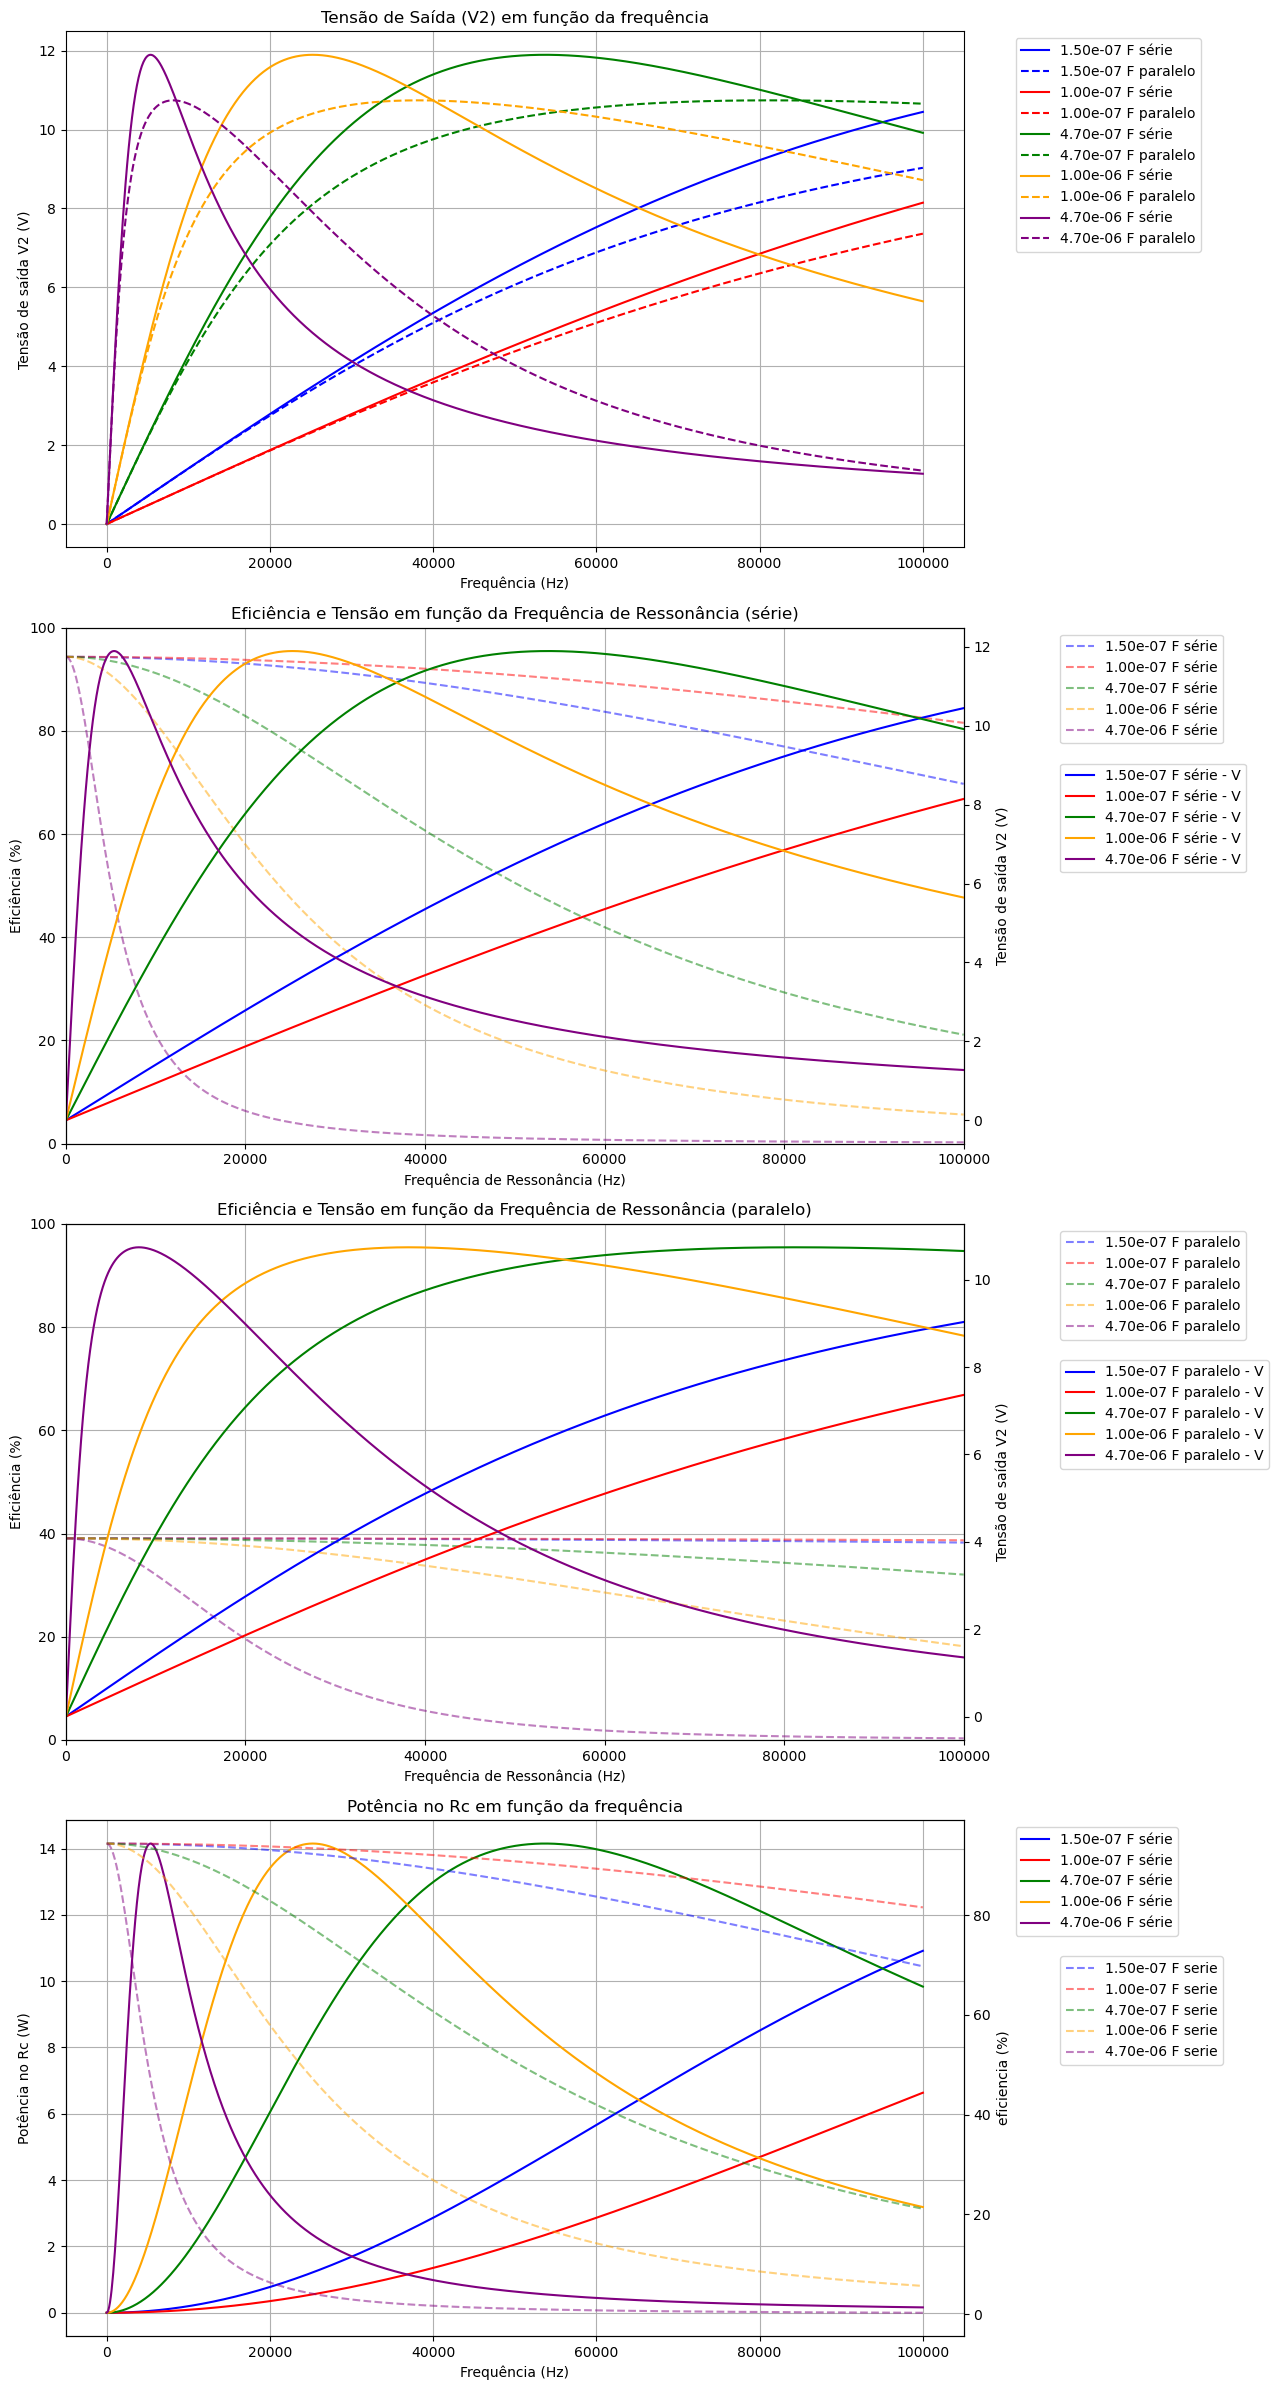

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Criar uma figura com três subplots verticais
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 24))

cores = ['b', 'r', 'g', 'orange', 'purple']
linestyles = ['-', '--']

ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()
ax4_twin = ax4.twinx()

for i, C in enumerate(valores_c2):
    V_serie = []
    V_paralelo = []
    ef_serie = []
    ef_paralelo = []
    P_res_serie = []
    P_res_paralelo = []
    
    for freq in frequencias:
        L1 = indutancia_ressonante(freq, C)
        L2 = indutancia_ressonante(freq, C)
        ZC1, ZL1, ZR1 = impedancia(R1, C, L1, freq)
        ZC2, ZL2, ZR2 = impedancia(R2, C, L2, freq)
        ZM = impedancia_ZM(L1, L2, K, freq)
        
        # Calcular para paralelo
        i1, i2, V2, eficiencia, P_res = CalcularTransformadorCapacitorParalelo(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_paralelo.append(V2)
        ef_paralelo.append(eficiencia)
        P_res_paralelo.append(P_res)
        
        # Calcular para série
        i1, i2, V2, eficiencia, P_res = CalcularTransformadorCapacitorSerie(ZR1, ZR2, Rc, ZC1, ZC2, ZL1, ZL2, ZM, Uf)
        V_serie.append(V2)
        ef_serie.append(eficiencia)
        P_res_serie.append(P_res)
    
    # Plotar tensão série e paralelo no primeiro gráfico (ax1)
    ax1.plot(frequencias, V_serie, label=f'{C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    ax1.plot(frequencias, V_paralelo, label=f'{C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1]) 

    # Plotar eficiência de serie no segundo gráfico (ax2)
    ax2.plot(frequencias, ef_serie, label=f'{C:.2e} F série', color=cores[i], linestyle=linestyles[1], alpha=0.5)
    ax2_twin.plot(frequencias, V_serie, label=f'{C:.2e} F série - V', color=cores[i], linestyle=linestyles[0])
    
    # Plotar eficiência de paralelo no terceiro gráfico (ax3)
    ax3.plot(frequencias, ef_paralelo, label=f'{C:.2e} F paralelo', color=cores[i], linestyle=linestyles[1], alpha=0.5)
    ax3_twin.plot(frequencias, V_paralelo, label=f'{C:.2e} F paralelo - V', color=cores[i], linestyle=linestyles[0])
    
    #plotando potencia
    ax4.plot(frequencias, P_res_serie, label=f'{C:.2e} F série', color=cores[i], linestyle=linestyles[0])
    # ax4.plot(frequencias, P_res_paralelo, label=f'{C:.2e} F paralelo', color=cores[i], linestyle=linestyles[0])
    ax4_twin.plot(frequencias, ef_serie, label=f'{C:.2e} F serie', color=cores[i], linestyle=linestyles[1], alpha=0.5)
    

# Configurações do gráfico de tensões (ax1)
ax1.set_title("Tensão de Saída (V2) em função da frequência")
ax1.set_xlabel("Frequência (Hz)")
ax1.set_ylabel("Tensão de saída V2 (V)")
ax1.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
ax1.grid(True)

# Configurações do gráfico de eficiência (ax2)
ax2.set_title("Eficiência e Tensão em função da Frequência de Ressonância (série)")
ax2.set_xlabel("Frequência de Ressonância (Hz)")
ax2.set_ylabel("Eficiência (%)")
ax2.legend(loc="upper left", bbox_to_anchor=(1.1, 1))
ax2.set_xlim(0, 100e3)
ax2.set_ylim(0, 100)
ax2.grid(True)

# Adicionar a legenda para o eixo secundário (twinx) do ax2
ax2_twin.set_ylabel("Tensão de saída V2 (V)")
ax2_twin.legend(loc="upper left", bbox_to_anchor=(1.1, 0.75))  # Legenda do twin

# Configurações do gráfico de eficiência (ax3)
ax3.set_title("Eficiência e Tensão em função da Frequência de Ressonância (paralelo)")
ax3.set_xlabel("Frequência de Ressonância (Hz)")
ax3.set_ylabel("Eficiência (%)")
ax3.legend(loc="upper left", bbox_to_anchor=(1.1, 1))
ax3.set_xlim(0, 100e3)
ax3.set_ylim(0, 100)
ax3.grid(True)

# Adicionar a legenda para o eixo secundário (twinx) do ax3
ax3_twin.set_ylabel("Tensão de saída V2 (V)")
ax3_twin.legend(loc="upper left", bbox_to_anchor=(1.1, 0.75))  # Legenda do twin

ax4.set_title("Potência no Rc em função da frequência")
ax4.set_xlabel("Frequência (Hz)")
ax4.set_ylabel("Potência no Rc (W)")
ax4.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
ax4.grid(True)

ax4_twin.set_ylabel("eficiencia (%)")
ax4_twin.legend(loc="upper left", bbox_to_anchor=(1.1, 0.75))  # Legenda do twin

# Ajustar layout para não sobrepor elementos
plt.tight_layout()

# Exibir gráfico
plt.show()


> Capacitor escolhido

C = 1.50 e^-7 F

f = 90 kHz

 >Encontrando L

In [87]:
C = 1.5e-7
f = 90e3
L1 = indutancia_ressonante(f, C)
L2 = indutancia_ressonante(f, C)
print(f'L1 = {L1:.2e} H')
print(f'L2 = {L2:.2e} H')

L1 = 2.08e-05 H
L2 = 2.08e-05 H


c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [83]:
# def CalcularTransformador(Uf, Rc):
#     Z=np.array([[R1+XL1, -XM],[-XM, XL2+R2+Rc]])
#     V=np.array([Uf,0])
#     i=np.dot(linalg.inv(Z),V)
#     return i[0], i[1]

d) Calcule as correntes $i_1$ e $i_2$ para três condições de carga ($R_C=1M\Omega$, $R_C=100\Omega$ e $R_C=1\Omega$). Assim que calcular as correntes, calcule também $V_2$ para cada resistor de carga (analise o circuito para saber como calculá-la). Por fim, calcule as relações $N_1/N_2$, $e_1/e_2$ e $V_1/V_2$ e, o mais importante: calcule as potências no primário ($S1$) e no secundário ($S2$).

IMPORTANTE: para dar print nas relações $N_1/N_2$, $V_1/V_2$ e $e_1/e_2$, você precisará usar o **módulo dos fasores**. Para calcular o módulo de um número complexo, use "np.abs(número complexo)".

In [84]:
# # Use essa célula para implementar o item d)

# Rcs = [1e6, 100, 1]
# Ufonte = 6

# for Rc in Rcs:
#     i1, i2 = CalcularTransformador(Ufonte, Rc)    
#     V2 = i2*Rc
#     V1 = Ufonte

#     e1 = XL1*i1 + XM*i2
#     e2 = XM*i1 + XL2*i2
    
#     S1 = V1/sqrt(2)*i1.conjugate()/sqrt(2)
#     S2 = V2/sqrt(2)*i2.conjugate()/sqrt(2)
    
#     print(f'Com o resistor na carga de {Rc} ohms:')
#     print(f'i1 (pico): {abs(i1)} A')
#     print(f'i2 (pico): {abs(i2)} A')
#     print(f'V1 (pico): {abs(V1)} V')
#     print(f'V2 (pico): {abs(V2)} V')
#     print(f'Relação N1/N2: {abs(sqrt(L1/L2))}')
#     print(f'Relação e1/e2: {abs(e1/e2)}')
#     print(f'Relação V1/V2: {abs(V1/V2)}')
#     print(f'S1 = {S1.real} + {S1.imag}j VA')
#     print(f'S2 = {S2.real} + {S2.imag}j VA')
#     print(f'Eficiência: {S2.real/S1.imag}')
#     print('\n')

e) Recalcule o item **d)**, mas agora considerando que o transformador é **ideal**. Para isso, basta zerar as resistências R1 e R2 do primário e do secundário. Após zer-a-las, copie o código do item d) na célula abaixo. O que você pode concluir sobre a potência real nas três condições de carga?